# 📊 Exploring of file UK Housing Prices

**Author: Tiebe Goossens**

This notebook explores the UK housing dataset using a representative sample.  
The full dataset contains 22M+ records, so we use a small sample (e.g., 2%)  
to make visualizations and aggregations run quickly.

**Keep in mind when you would run this notebook, graphs could differ from the markdowns, this is because we only take 2% of the original dataset (~450K records)**

## Create EDA Sample (to speed up the next notebook)

Since the dataset contains over 22 million rows, we create a small but representative sample for exploration.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.api.types import CategoricalDtype

In [2]:
df = pd.read_csv("../Data/housing_prices/price_paid_records.csv", low_memory=False)

In [3]:
df_sample = df.sample(frac=0.02, random_state=42)
df_sample.to_csv("../Data/housing_prices/eda_sample.csv", index=False)

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449787 entries, 13893637 to 19937434
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Transaction unique identifier      449787 non-null  object
 1   Price                              449787 non-null  int64 
 2   Date of Transfer                   449787 non-null  object
 3   Property Type                      449787 non-null  object
 4   Old/New                            449787 non-null  object
 5   Duration                           449787 non-null  object
 6   Town/City                          449787 non-null  object
 7   District                           449787 non-null  object
 8   County                             449787 non-null  object
 9   PPDCategory Type                   449787 non-null  object
 10  Record Status - monthly file only  449787 non-null  object
dtypes: int64(1), object(10)
memory usage: 41.2+ MB


In [4]:
df_sample = pd.read_csv("../Data/housing_prices/eda_sample.csv")

## 📈 3. Price Distribution
We explore how property prices are distributed across England & Wales.



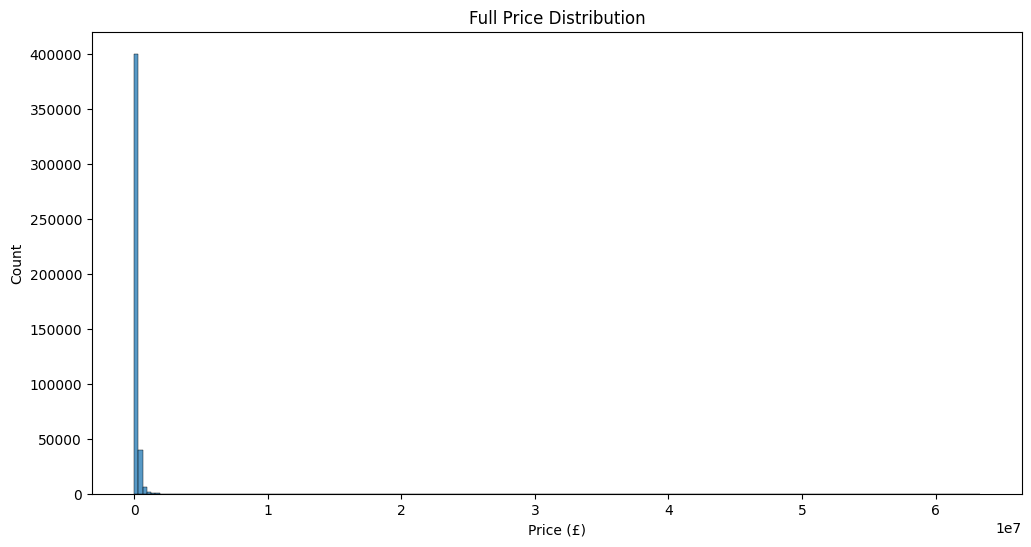

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(df_sample['Price'], bins=200)
plt.title("Full Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

#### ✅ Insight

The full price distribution is heavily **right-skewed**.  
Most homes sell for **below £400k**, but a long tail of expensive properties stretches upward.  
This skew is typical in real estate, due to premium areas (e.g., London).


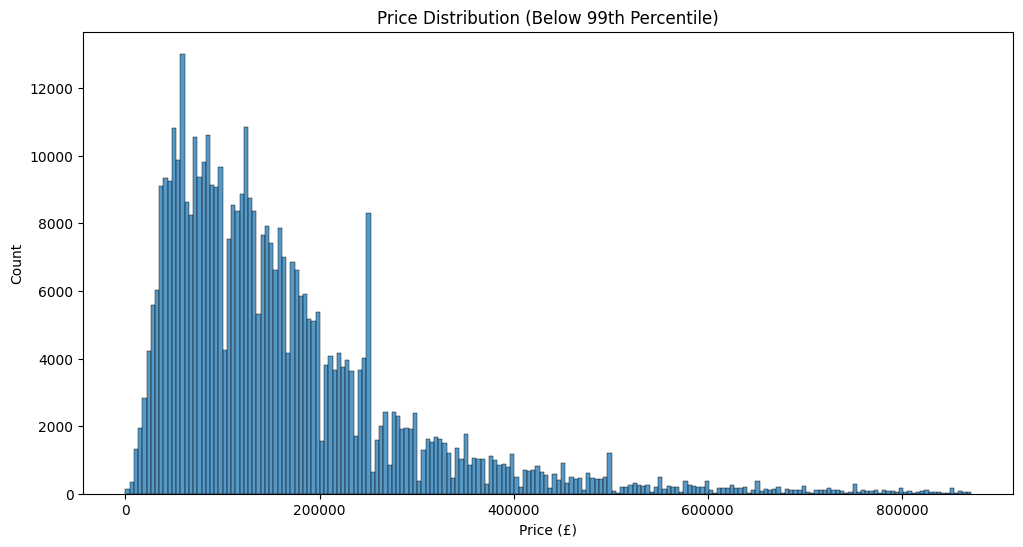

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(df_sample[df_sample['Price'] < df_sample['Price'].quantile(0.99)]['Price'], bins=200)
plt.title("Price Distribution (Below 99th Percentile)")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

#### ✅ Insight

Zooming in reveals that the **typical home price** ranges between **£50k–£300k**, with the most common around **£75k–£175k**.  
This view excludes luxury outliers and better represents the main market.


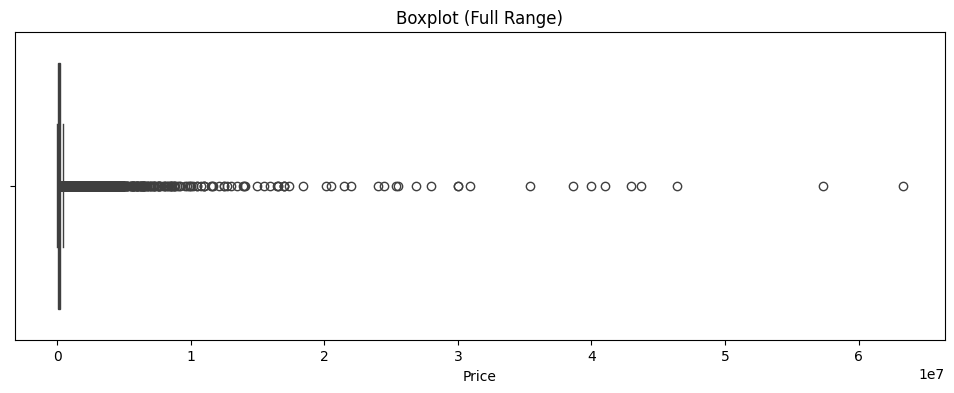

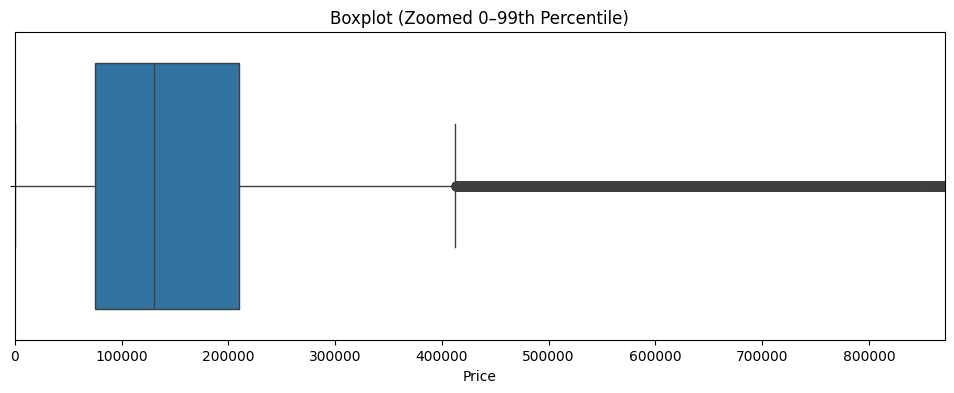

In [7]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df_sample['Price'])
plt.title("Boxplot (Full Range)")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(x=df_sample['Price'])
plt.xlim(0, df_sample['Price'].quantile(0.99))
plt.title("Boxplot (Zoomed 0–99th Percentile)")
plt.show()

#### ✅ Insight

Boxplots confirm the skewed nature of prices:  
- A tight cluster of typical homes in the lower range  
- A long stretch of high-value outliers (luxury properties)  
These outliers are legitimate real transactions, not errors.


## 📅 Convert Date Column


In [8]:
df_sample['Date of Transfer'] = pd.to_datetime(df_sample['Date of Transfer'])

## 📈 Median Price Over Time (Yearly)

This helps identify long-term trends for forecasting models.


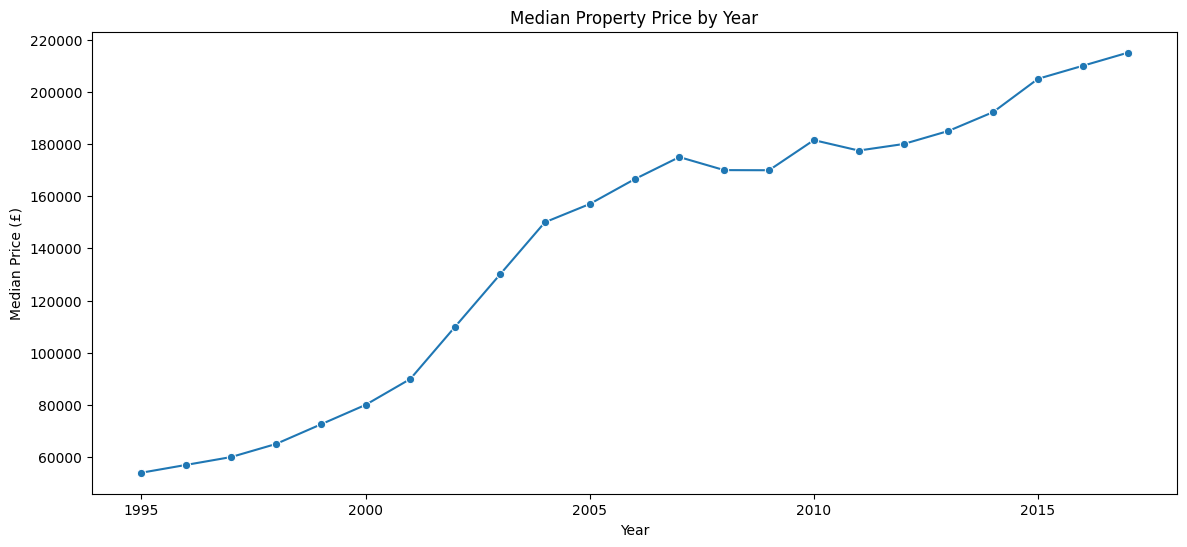

In [9]:
df_sample['Year'] = df_sample['Date of Transfer'].dt.year

yearly = df_sample.groupby('Year')['Price'].median()

plt.figure(figsize=(14,6))
sns.lineplot(x=yearly.index, y=yearly.values, marker="o")
plt.title("Median Property Price by Year")
plt.xlabel("Year")
plt.ylabel("Median Price (£)")
plt.show()

#### ✅ Insight

The long-term trend shows a **steady price increase**, with dips around:  
- **2008-2009** (Global Financial Crisis)  
- **2020** (Covid)

Prices rise strongly from **2001 onward**, consistent with real UK housing patterns.


## 📅 Monthly Median Price Trend


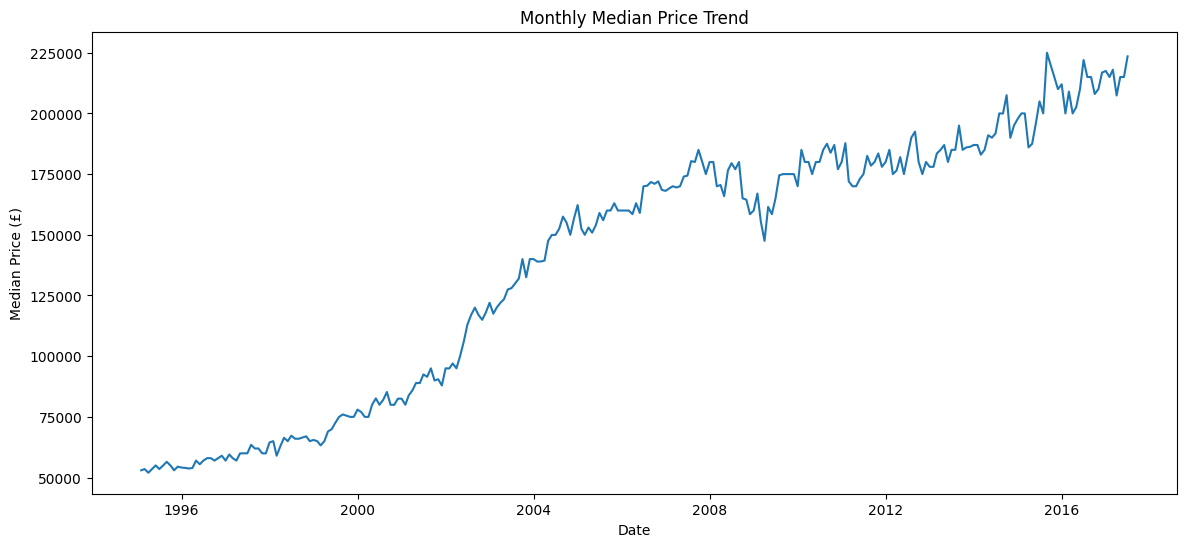

In [10]:
monthly = df_sample.resample("ME", on="Date of Transfer")['Price'].median()

plt.figure(figsize=(14,6))
sns.lineplot(x=monthly.index, y=monthly.values)
plt.title("Monthly Median Price Trend")
plt.xlabel("Date")
plt.ylabel("Median Price (£)")
plt.show()


#### ✅ Insight

Monthly data shows more short-term fluctuations, including:  
- Seasonal effects  
- Economic cycles  
- Local spikes


## 🏠 Distribution of Property Types

**F**lat **T**erraced **S**emi-detached **D**etached **O**ther

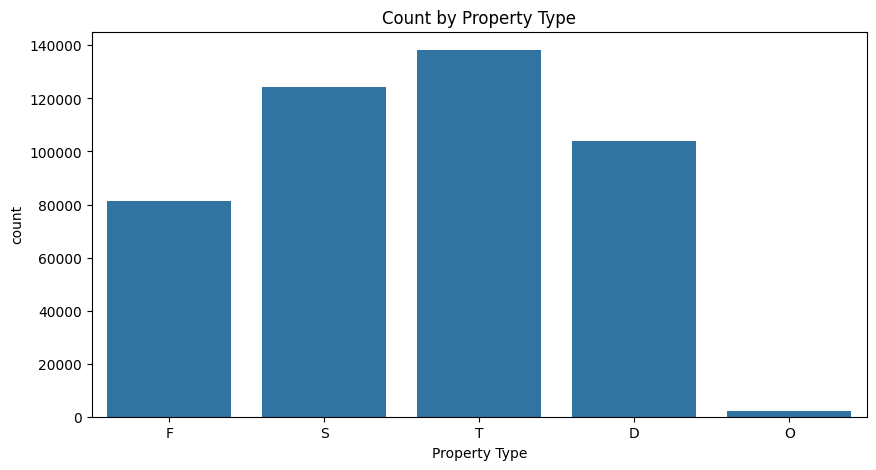

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_sample['Property Type'])
plt.title("Count by Property Type")
plt.show()

#### ✅ Insight

Terraced and semi-detached homes dominate the market, followed by detached.  
flats homes are less common, reflecting higher land requirements and prices.


However this is just a subset, the larger full scale set, would put flats in 3th place, due to some larger cities.


## 🏠 Median Price by Property Type

**F**lat **T**erraced **S**emi-detached **D**etached **O**ther

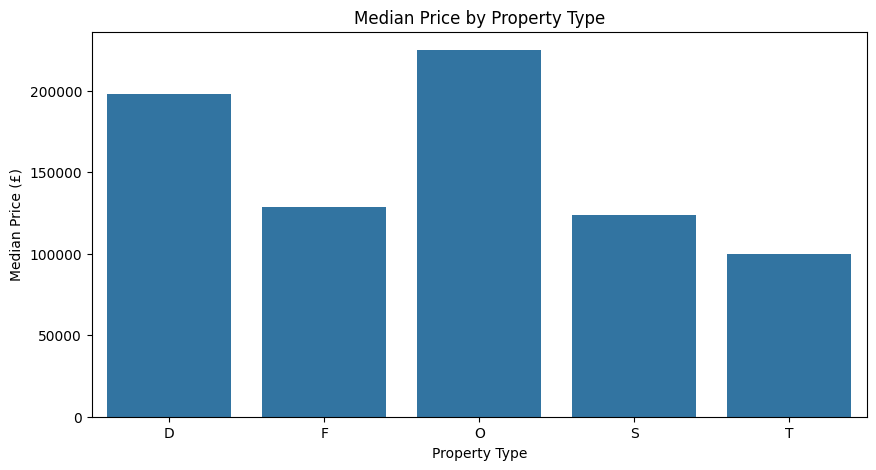

In [12]:
median_by_type = df_sample.groupby('Property Type')['Price'].median()

plt.figure(figsize=(10,5))
sns.barplot(x=median_by_type.index, y=median_by_type.values)
plt.title("Median Price by Property Type")
plt.ylabel("Median Price (£)")
plt.show()


### ✅ Insight

Clear price hierarchy:

🥇 **Detached** (highest)  
🥈 Flats  
🥉 Semi-detached  
🏢 Terraced (lowest)

This confirms property type is a **strong predictor** for price modelling.


## 🆕 Old vs New Properties


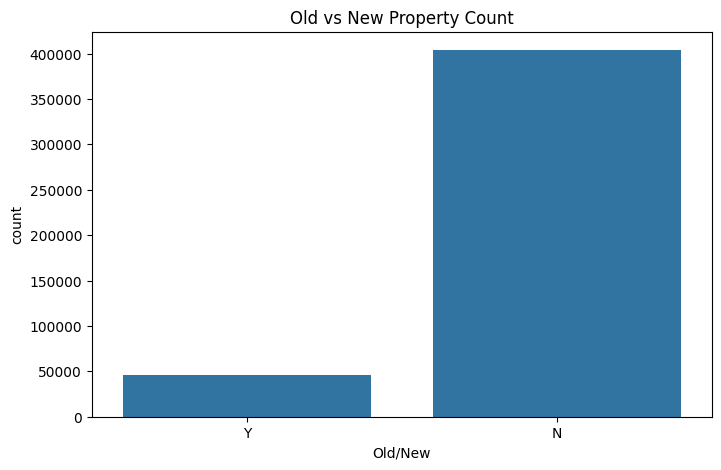

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_sample['Old/New'])
plt.title("Old vs New Property Count")
plt.show()

#### ✅ Insight

Most transactions are **old properties**, with new builds representing a much smaller share.  
This distribution is expected nationwide.


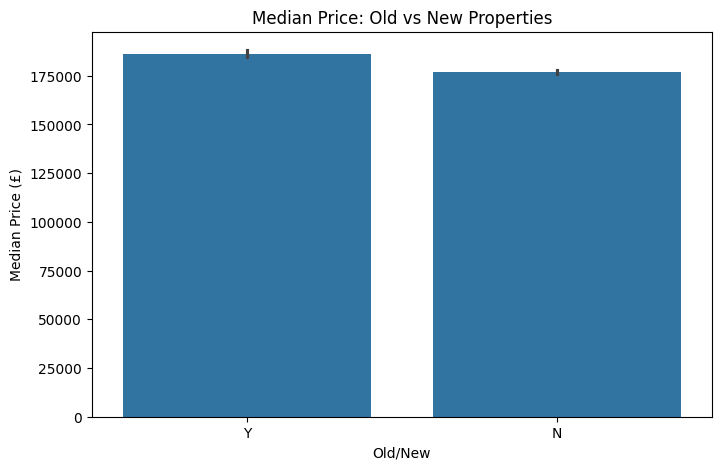

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_sample['Old/New'], y=df_sample['Price'])
plt.title("Median Price: Old vs New Properties")
plt.ylabel("Median Price (£)")
plt.show()

#### ✅ Insight

New properties (**Y**) tend to sell for **higher prices** than old ones (**N**).  
Reasons include:
- Modern standards  
- Energy-efficient materials  
- New developments in higher-priced regions  


## 🧾 Duration (Freehold vs Leasehold)


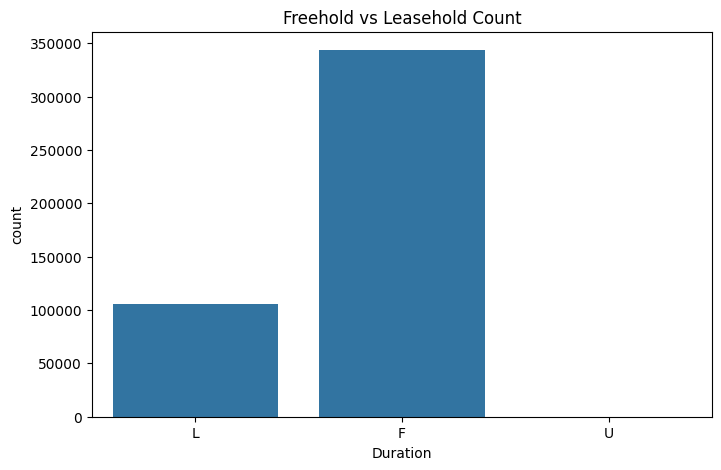

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_sample['Duration'])
plt.title("Freehold vs Leasehold Count")
plt.show()

#### ✅ Insight

Freehold (**F**) is more common than leasehold (**L**).  
Leasehold is typical for:
- Flats
- Some urban properties


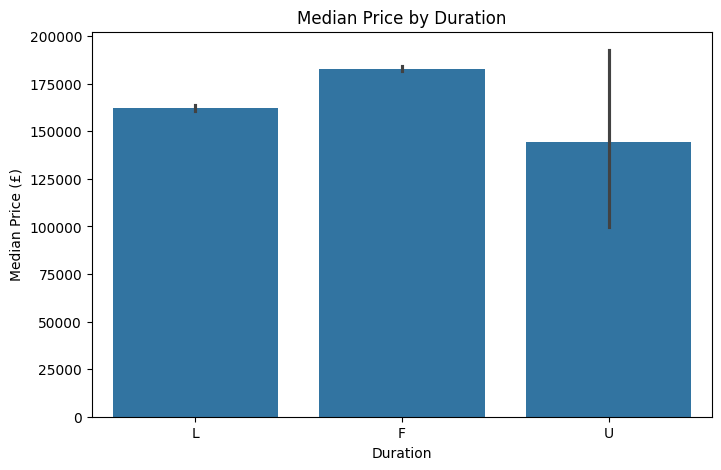

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_sample['Duration'], y=df_sample['Price'])
plt.title("Median Price by Duration")
plt.ylabel("Median Price (£)")
plt.show()

#### ✅ Insight

Freehold properties consistently sell for higher prices than leasehold ones.  
This fits the UK market where leasehold comes with:
- Ground rent  
- Service charges  
- Time-limited ownership  


## 🗺️ Prices by County (Top 20)


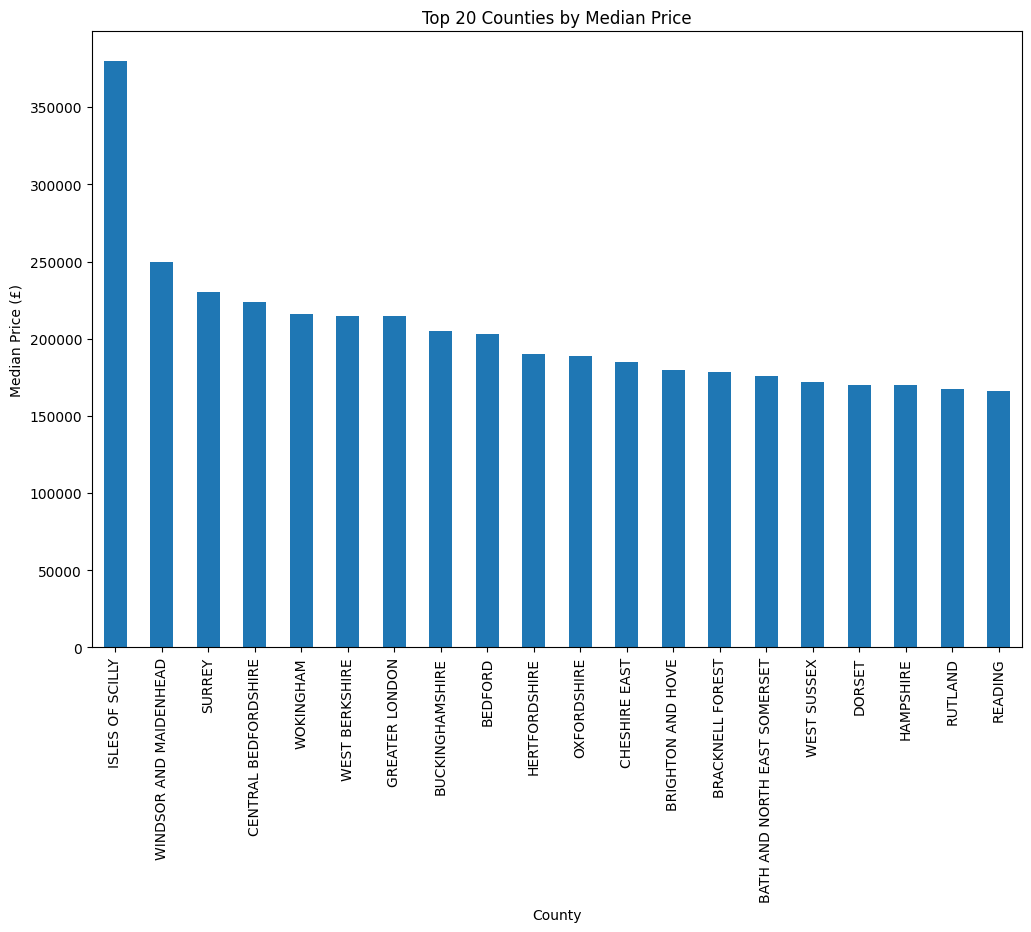

In [17]:
county_prices = (
    df_sample.groupby('County')['Price']
             .median()
             .sort_values(ascending=False)
)

plt.figure(figsize=(12,8))
county_prices.head(20).plot(kind="bar")
plt.title("Top 20 Counties by Median Price")
plt.ylabel("Median Price (£)")
plt.show()


#### ✅ Insight

### ✅ Insight

London boroughs and surrounding counties dominate the top:  
- Kensington & Chelsea  
- Westminster  
- Camden  
- Richmond  
- Surrey  

This reflects the **London premium** effect.


This reflects the **London premium** effect.


## 📦 Transaction Volume by County


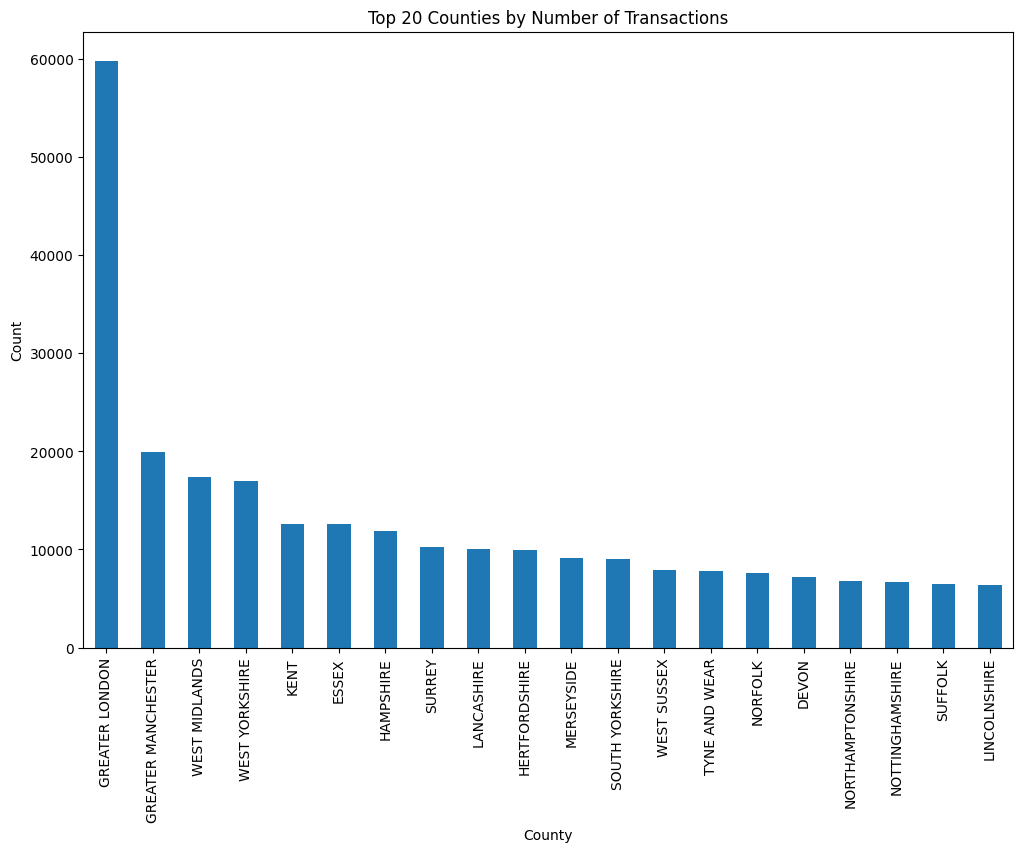

In [18]:
top_counties = df_sample['County'].value_counts().head(20)

plt.figure(figsize=(12,8))
top_counties.plot(kind="bar")
plt.title("Top 20 Counties by Number of Transactions")
plt.ylabel("Count")
plt.show()


#### ✅ Insight

Counties with the **largest populations** naturally show the most transactions:  
- Greater London 
- Greater Manchester  

High volume helps reduce variance in price predictions.


## 🔥 Heatmap: Property Type Distribution by County


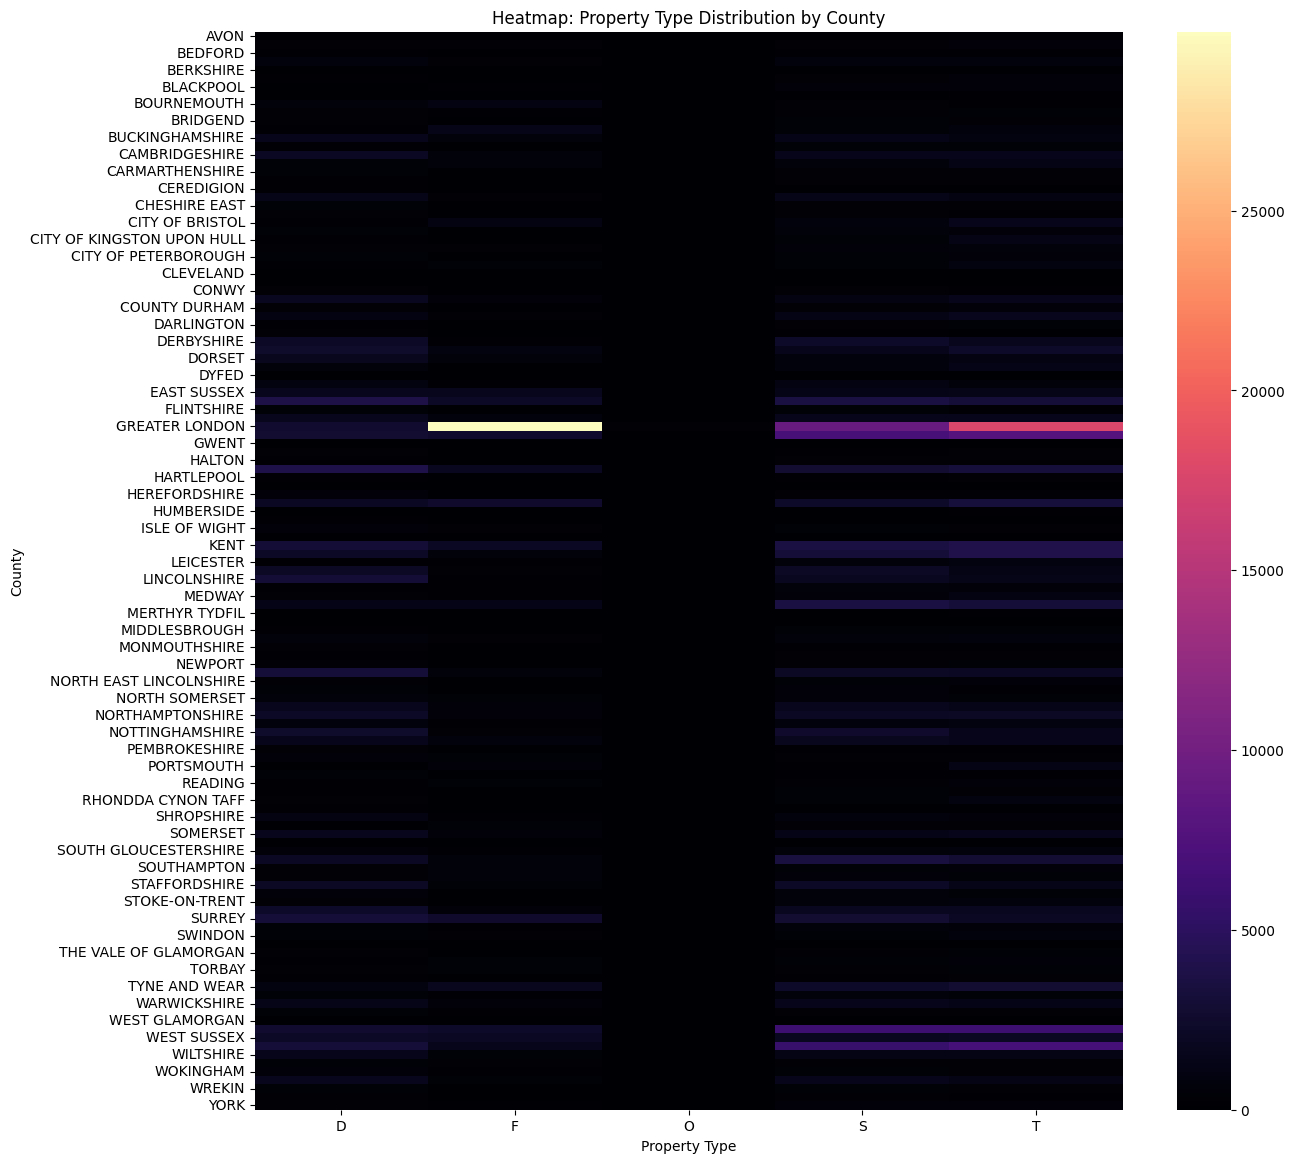

In [19]:
pivot = df_sample.pivot_table(
    index='County',
    columns='Property Type',
    aggfunc='size',
    fill_value=0
)

plt.figure(figsize=(14,14))
sns.heatmap(pivot, cmap="magma")
plt.title("Heatmap: Property Type Distribution by County")
plt.show()


#### ✅ Insight

The heatmap shows clusters of counties with similar property mixes.  
For example:
- Urban areas → more flats  
- Suburban/rural → more detached or semi-detached homes 

# ✅ Summary of Exploratory Findings

- Prices show a clear **upward trend** over time  
- Distribution shows typical right-skew for housing markets  
- Property type strongly affects price (Detached > Semi > Terrace > Flat)  
- Freehold properties sell for more than leasehold  
- New builds generally cost more  
- Counties vary widely in median prices (London highest)  
- Monthly and yearly medians will be excellent for forecasting models  

This notebook prepares the ground for the **time-series forecasting model** to predict prices in 2030–2040.
